In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# VIDEO: Standard matrix multiplication, parts 1 & 2
---


In [ ]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
np.matmul(A,A)
np.matmul(A.T,C)
np.matmul(B,B.T)
np.matmul(np.matrix.transpose(B),B)
np.matmul(B,C)
np.matmul(C,B)
np.matmul(C.T,B)
np.matmul(C,B.T)


---
# VIDEO: Order-of-operations on matrices
---


In [ ]:

n = 7
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2


---
# VIDEO: Matrix-vector multiplication
---


In [ ]:

# number of elements
m = 4

# create matrices
N = np.random.randint(-10,11,(m,m))
S = np.round( N.T*N / m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
print( S@w )     # 1
print( S.T@w )   # 2
print( w@S )     # 3
print( w.T@S.T ) # 4
print( w.T@S )   # 5


# with nonsymmetric matrix
print( N@w )     # 1
print( N.T@w )   # 2
print( w@N )     # 3
print( w.T@N.T ) # 4
print( w.T@N )   # 5



---
# VIDEO: 2D transformation matrices
---


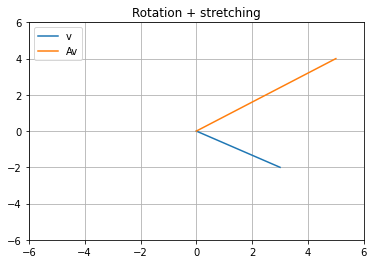

In [2]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

In [ ]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()


---
# VIDEO: Additive and multiplicative matrix identities
---


In [ ]:
# size of matrices
n = 4

# create the matrices
A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n)
Z = np.zeros((n,n))

# test both identities
np.array_equal( A@I , A   )
np.array_equal( A   , A@I )
np.array_equal( A   , A+I )

np.array_equal( A   , A+I )
np.array_equal( A+Z , A@I )



---
# VIDEO: Additive and multiplicative symmetric matrices
---


In [ ]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + A.T )/2

# A symmetric matrix minus its transpose should be all zeros
print( S-S.T )


In [ ]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - AtA.T )
print( AAt - AAt.T )




---
# VIDEO: Element-wise (Hadamard) multiplication
---


In [ ]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C1 = np.multiply( A,B )
C2 = A*B

print(C1), print(' ')
print(C2), print(' ')

print(C1-C2)



---
# VIDEO: Multiplication of two symmetric matrices
---


In [ ]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )


In [ ]:
# nice printing in sympy
init_printing()

# but AB neq (AB)'
A@B - (A@B).T

# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

# A1@B1 - (A1@B1).T


---
# VIDEO: Frobenius dot-product
---


In [ ]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( A.T@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( A.T@A ) )
# print(Anorm)
# print(Anorm2)

# VIDEO: Matrix norms

In [ ]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])

# optional orthogonal matrix to show that 2-norm is 1
Q,R = np.linalg.qr(np.random.randn(5,5))
# A = Q

# Frobenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2-norm
normInd2 = np.linalg.norm(A,2)
# note: computed as below
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 2
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normSchat,normInd2)
